## Тарабонда Герман

### Задание № 4

### (A)

Сначала проинтегрируем по-отдельности каждый член: $\int\limits_0^3 \frac{dx}{k^2-k-x} = -\log{|k^2-k-x|}\big|_0^3 = \log{|1+\frac{3}{k^2-k-3}|}$
Тепреь оценим остаток и найдем такое $n$, чтобы $R_n < \varepsilon$:

$R(x) \leqslant \int\limits_n^\infty \log{|1+\frac{3}{x^2-x-3}|}dx = \frac{1}{2}(2x\log{|1+\frac{3}{x^2-x-3}|} + \log{((1-2x)^2-13)} + \sqrt{13}\log{\frac{(-2x+1+\sqrt{13})^2}{(1-2x)^2-13}} - \log{(1-x)^2}) \big|_n^\infty =$

$\log{2} - \frac{1}{2}(2n\log{|1+\frac{3}{n^2-n-3}|} + \log{((1-2n)^2-13)} + \sqrt{13}\log{\frac{(-2n+1+\sqrt{13})^2}{(1-2n)^2-13}} - \log{(1-n)^2}) < \varepsilon$

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_int_of_r_a(n: int) -> float:
    return (math.log(2) - (2 * n * math.log(1 + 3 / (n * n - n - 3)) + 
                           math.log((1 - 2 * n) ** 2 - 13) +
                           math.sqrt(13) * math.log(((-2 * n + 1 + math.sqrt(13)) ** 2)
                                                   / ((1 - 2 * n) ** 2 - 13)) - 
                           math.log((1 - n) ** 2)) / 2)

def find_n_for_a_sum(epsilon: float) -> int:
    n = 3
    while  find_int_of_r_a(n) >= epsilon:
        n += 1
    return n

def calculate_int_member(n: int) -> float:
    return math.log(1 + 3 / (n * n - n - 3))

def int_of_sum_a(epsilon: float):
    n = find_n_for_a_sum(epsilon)
    print('Sum of: ' + str(n) + ' members')
    return sum([calculate_int_member(k) for k in range(3, n + 1)])

In [3]:
I_0 = int_of_sum_a(1e-7)
print('The integral of sum equals: ' + str(I_0))

Sum of: 29364947 members
The integral of sum equals: 1.7558526960159755


## (B)

Теперь попробуем оценить количество слагаемых, которое нужно использовать при подсчете суммы. Пусть точность будет равна $\varepsilon = 10^{-7}$. Тогда так как нам нужно будет сложить $m$ слагаемых для интеграла, то нам нужно, чтобы точность каждой посчитанной суммы должна быть равна: $\varepsilon / m$. Будем считать сумму аналогично тому как считал во втором задании.

In [ ]:
def calculate_member(n: int, x: float) -> float:
    return 1 / (n * n - n - x)

def calculate_trap(n: int, a: float, b: float) -> float:
    w_a = sum([calculate_member(k, a) for k in range(3, n + 1)])
    w_b = sum([calculate_member(k, b) for k in range(3, n + 1)])
    return (w_a + w_b) * (b - a) / 2

def calculate_trap_int(n: int, m: int) -> float:
    lines = [a + (b - a) * i / m for i in range(m + 1)]
    return sum([calculate_trap(n, lines[i - 1], lines[i]) for i in range(1, len(lines))]) 

def calculate_simpson(n: int, a: float, b: float) -> float:
    w_a = sum([calculate_member(k, a) for k in range(3, n + 1)])
    w_m = sum([calculate_member(k, (a + b) / 2) for k in range(3, n + 1)])
    w_b = sum([calculate_member(k, b) for k in range(3, n + 1)])
    return (w_a + 4 * w_m + w_b) * (b - a) / 6

def calculate_simpson_int(n: int, m: int) -> float:
    lines = [a + (b - a) * i / m for i in range(m + 1)]
    return sum([calculate_trap(n, lines[i - 1], lines[i]) for i in range(1, len(lines))])  

В задание номер два, чтобы считать сумму быстрее, я использовал данные вычисления, которые я использую и в этом задании:

Возьмем ряд $\sum\limits_{k=3}^{\infty} b_k = \sum\limits_{k=3}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6} - \frac{5}{4}$
Так как $\lim_{k \rightarrow \infty} \frac{a_k}{b_k} = \lim_{k \rightarrow \infty} \frac{k^2}{k^2-k-z} = 1$, то можем использовать этот ряд для более быстрой сходимости $\sum\limits_{k=3}^{\infty} \frac{1}{k^2-k-z} = \frac{\pi^2}{6} - \frac{5}{4} + \sum\limits_{k=3}^{\infty} \left( \frac{1}{k^2-k-z} - \frac{1}{k^2} \right) = \frac{\pi^2}{6} - \frac{5}{4} + \sum\limits_{k=3}^{\infty} \frac{k+z}{k^2(k^2-k-z)}$ 

Теперь оценим остаток: $|R_n| \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+z}{k^2(k^2-k-z)}$ 
Так как производная положительна по $z$: $\left( \frac{k+z}{k^2-k-z} \right)' = \frac{k^2}{(k^2-k-z)^2} > 0$, то возьмем $z = 3$: 

$|R_n| \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+z}{k^2(k^2-k-z)} \leqslant \sum\limits_{k = n + 1}^\infty \frac{k+3}{k^2(k^2-k-3)} \leqslant  \int\limits_{n}^\infty \frac{k+3}{k^2(k^2-k-3)} = \frac{\ln{|-2x+\sqrt{13}+1|}-\ln{|2x+\sqrt{13}-1|}}{\sqrt{13}} + \frac{1}{x} \big|_{n}^\infty = \frac{\ln{|\frac{-2n+\sqrt{13}+1}{2n+\sqrt{13}-1}|}}{\sqrt{13}} - \frac{1}{n}$

И в итоге нам нужно подобрать такое $n$, что $\frac{\ln{|\frac{-2n+\sqrt{13}+1}{2n+\sqrt{13}-1}|}}{\sqrt{13}} - \frac{1}{n} < \varepsilon$

In [4]:
def count_n_for_sum(eps: float) -> int:
    n = 100
    while not (math.log(abs((-2 * n + math.sqrt(13) + 1)/(2 * n + math.sqrt(13) - 1))) 
               / math.sqrt(13) - 1 / n) < eps:
        n += 1
    return n

def count_supporting_sum(k: int, z: float) -> float:
    return (k + z) / ((k * k) * (k * k - k - z))

def count_w(z: float, N: int) -> float:
    # k + 1, так как нумерация с нуля
    return ((math.pi ** 2) / 6 - 5 / 4 +
            sum([count_supporting_sum(k, z) for k in range(3, N + 1)]))

In [5]:
def calculate_trap(n: int, a: float, b: float) -> float:
    w_a = count_w(a, n)
    w_b = count_w(b, n)
    return (w_a + w_b) * (b - a) / 2

def calculate_trap_int(n: int, m: int, a: float, b: float) -> float:
    lines = [a + (b - a) * i / m for i in range(m + 1)]
    return sum([calculate_trap(n, lines[i - 1], lines[i]) for i in range(1, len(lines))]) 

def calculate_simpson(n: int, a: float, b: float) -> float:
    w_a = count_w(a, n)
    w_m = count_w((a + b) / 2, n)
    w_b = count_w(a, n)
    return (w_a + 4 * w_m + w_b) * (b - a) / 6

def calculate_simpson_int(n: int, m: int, a: float, b: float) -> float:
    lines = [a + (b - a) * i / m for i in range(m + 1)]
    return sum([calculate_simpson(n, lines[i - 1], lines[i]) for i in range(1, len(lines))])  

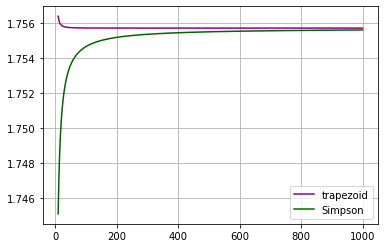

In [16]:
eps = 1e-13
Ms = range(10, 1001)
I_t = [calculate_trap_int(count_n_for_sum(eps / m), m, 0, 3) for m in Ms]
I_s = [calculate_simpson_int(count_n_for_sum(eps / m), m, 0, 3) for m in Ms]

plt.plot(Ms, I_t, color='darkmagenta', label='trapezoid')
plt.plot(Ms, I_s, color='darkgreen', label='Simpson')
plt.grid()
plt.legend()
plt.show()

In [17]:
def calculate_a2(x: float):
    return sum([2 / ((k * k - k - x) ** 3) for k in range(3, 10000)])

def find_max_a2() -> float:
    return max([calculate_a2(x) for x in np.arange(0, 3, 0.1)])

def calculate_a4(x: float):
    return sum([24 / ((k * k - k - x) ** 5) for k in range(3, 10000)])

def find_max_a4() -> float:
    return max([calculate_a4(x) for x in np.arange(0, 3, 0.1)])

def trap_accuracy(a: float, b: float, m: int) -> float:
    return find_max_a2() * (b - a) ** 3 / (2 * m * m)

def simpson_accuracy(a: float, b: float, m: int) -> float:
    return find_max_a4() * (b - a) ** 5 / (2880 * (m ** 4))

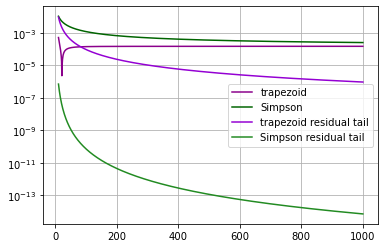

In [18]:
I_t_d = [abs(i - I_0) for i in I_t]
I_s_d = [abs(i - I_0) for i in I_s]

D_t = [trap_accuracy(0, 3, m) for m in Ms]
D_s = [simpson_accuracy(0, 3, m) for m in Ms]

plt.plot(Ms, I_t_d, color='darkmagenta', label='trapezoid')
plt.plot(Ms, I_s_d, color='darkgreen', label='Simpson')
plt.plot(Ms, D_t, color='darkviolet', label='trapezoid residual tail')
plt.plot(Ms, D_s, color='forestgreen', label='Simpson residual tail')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()